## Importing all dependence 

In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Import and normalize the data

In [28]:
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [29]:
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

## make a neural network and train it 

In [30]:
#there are two types of models
#sequential is most common, why?

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
#reshape

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9218 - loss: 0.2683
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9669 - loss: 0.1081
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9773 - loss: 0.0724


## check model accuracy and loss 

In [31]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print("loss-> ",val_loss,"\nacc-> ",val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9695 - loss: 0.0959    
loss->  0.09594617784023285 
acc->  0.9695000052452087


## prediction using model

 44/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

C:\Users\BELLAJMED\anaconda3\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_41
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\BELLAJMED\anaconda3\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_41
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


label ->  1
prediction ->  1


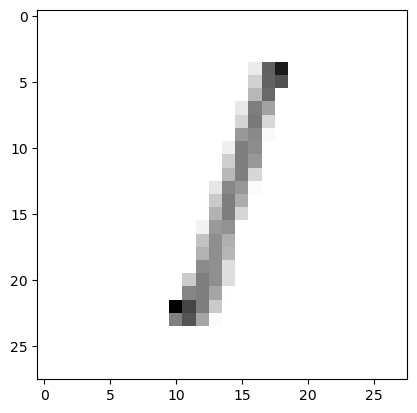

In [32]:
predictions=model.predict([x_test])
print('label -> ',y_test[2])
print('prediction -> ',np.argmax(predictions[2]))

draw(x_test[2])

## saving and testing model 

In [35]:
#  Le code à utiliser pour la CRÉATION et la SAUVEGARDE (recommandé)
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Une fois corrigé, le code de sauvegarde fonctionnera correctement
model.save('epic_num_reader_corrected.h5')

In [37]:
# Définition de l'alias temporaire pour 'softmax_v2'
def softmax_v2(x):
    return tf.nn.softmax(x)

# 🛠️ Le code de chargement corrigé
new_model = tf.keras.models.load_model('epic_num_reader.h5', custom_objects={'softmax_v2': softmax_v2})

 44/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   

C:\Users\BELLAJMED\anaconda3\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_1
Received: inputs=('Tensor(shape=(32, 28, 28))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\BELLAJMED\anaconda3\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_1
Received: inputs=('Tensor(shape=(None, 28, 28))',)
  warnings.warn(msg)


label ->  1
prediction ->  1


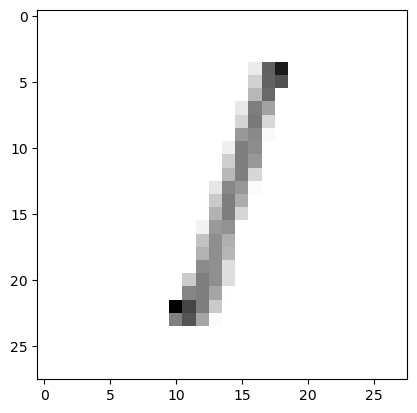

In [38]:
predictions=new_model.predict([x_test])


print('label -> ',y_test[2])
print('prediction -> ',np.argmax(predictions[2]))

draw(x_test[2])